<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_values)


df_cleaned = df.dropna(subset=['Employment', 'JobSat', 'RemoteWork'])
recheck_mv = df_cleaned[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(recheck_mv)

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


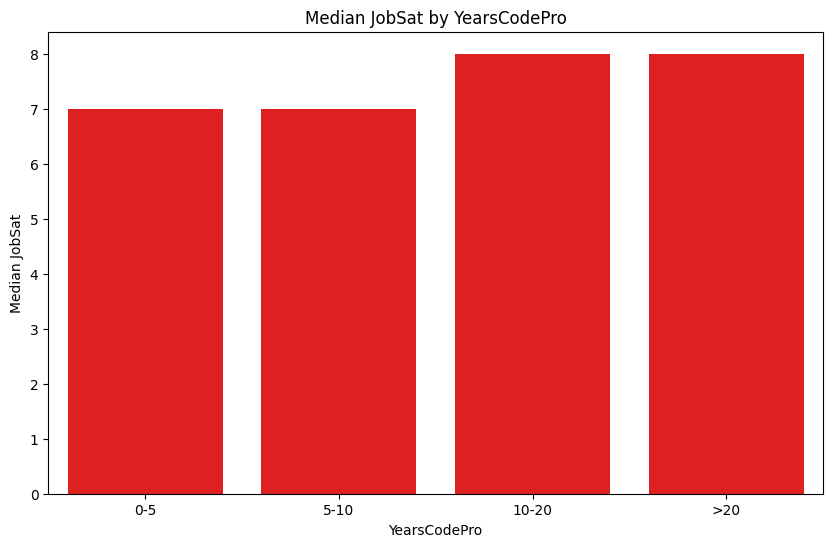

In [5]:
## Write your code here
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
experience_bins = [0, 5, 10, 20, float('inf')]
experience_labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=experience_bins, labels=experience_labels, include_lowest=True)

median_jobsat = df.groupby('ExperienceRange', observed=False)['JobSat'].median().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=median_jobsat, x='ExperienceRange', y='JobSat', color='red')
plt.xlabel('YearsCodePro')
plt.ylabel('Median JobSat')
plt.title('Median JobSat by YearsCodePro')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


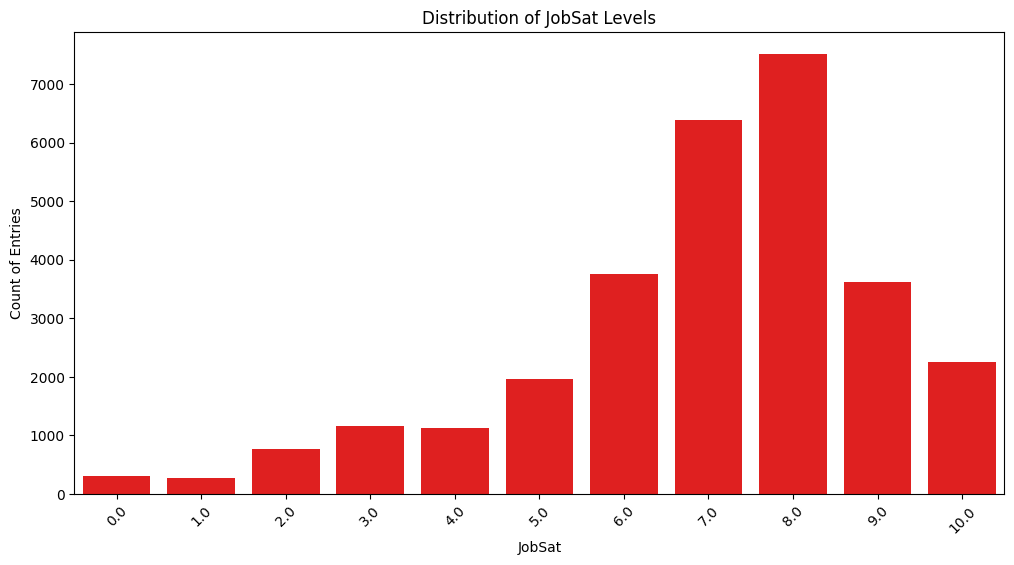

In [6]:
## Write your code here
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='JobSat',color='red')
plt.xlabel('JobSat')
plt.ylabel('Count of Entries')
plt.title('Distribution of JobSat Levels')
plt.xticks(rotation=45)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


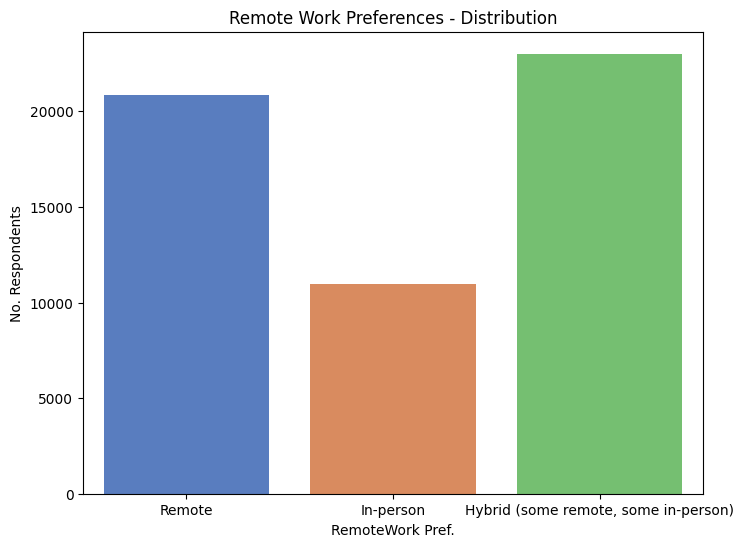


Cross-tabulation of Remote Work by DevType (Percentage of 'Remote' for each DevType):
 DevType_List
Academic researcher                              0.120167
Blockchain                                       0.712871
Cloud infrastructure engineer                    0.464580
Data engineer                                    0.386617
Data or business analyst                         0.259494
Data scientist or machine learning specialist    0.307443
Database administrator                           0.318471
Designer                                         0.416058
DevOps specialist                                0.379381
Developer Advocate                               0.616162
Developer Experience                             0.457286
Developer, AI                                    0.358811
Developer, QA or test                            0.466395
Developer, back-end                              0.451296
Developer, desktop or enterprise applications    0.314855
Developer, embedded applicati

In [10]:
## Write your code here
plt.figure(figsize=(8, 6))
sns.countplot(x='RemoteWork', data=df, hue='RemoteWork', palette="muted", legend=False)
plt.title('Remote Work Preferences - Distribution')
plt.xlabel('RemoteWork Pref.')
plt.ylabel('No. Respondents')
plt.show()

df['DevType'] = df['DevType'].fillna('Unknown')
df['DevType_List'] = df['DevType'].str.split(';')

df_exploded = df.explode('DevType_List')
df_exploded['DevType_List'] = df_exploded['DevType_List'].str.strip()

devtype_remote = df_exploded.groupby('DevType_List')['RemoteWork'].value_counts(normalize=True).unstack()
devtype_remote_yes = devtype_remote.get('Remote', pd.Series(dtype='float64'))

print("\nCross-tabulation of Remote Work by DevType (Percentage of 'Remote' for each DevType):\n", devtype_remote_yes)
df.drop(columns='DevType_List', inplace=True)
df_exploded.drop(columns='DevType_List', inplace=True)

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_3246/1402976020.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_counts.head(10), x='Count', y='Programming Language', palette='muted')


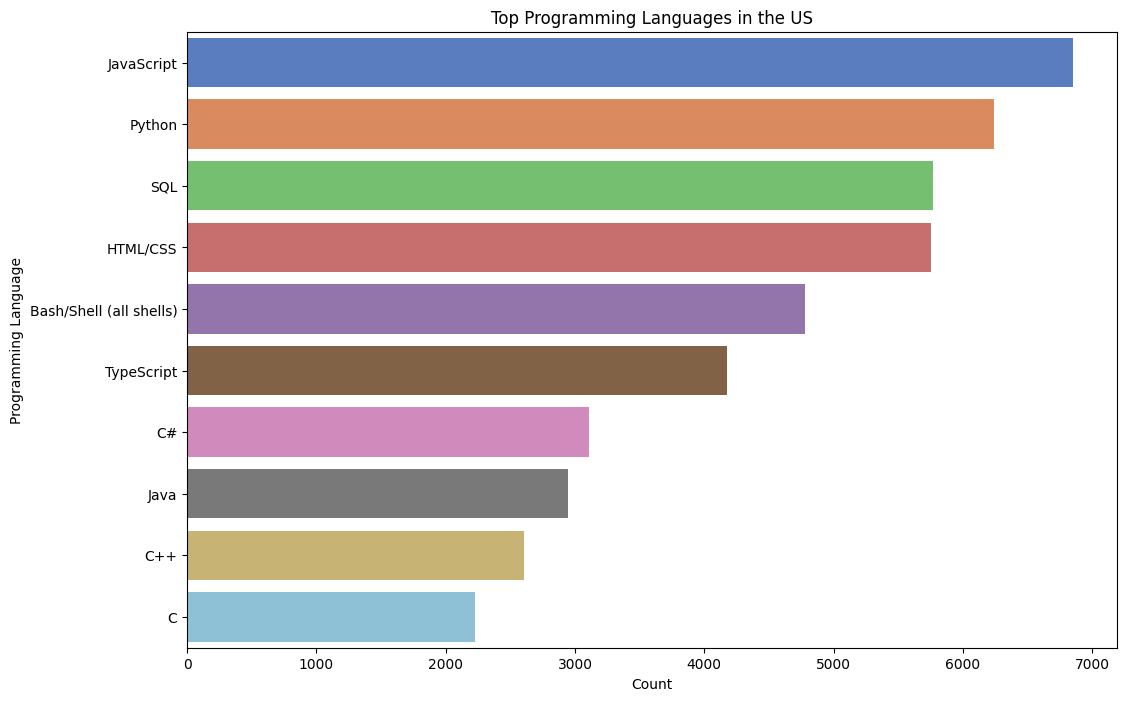

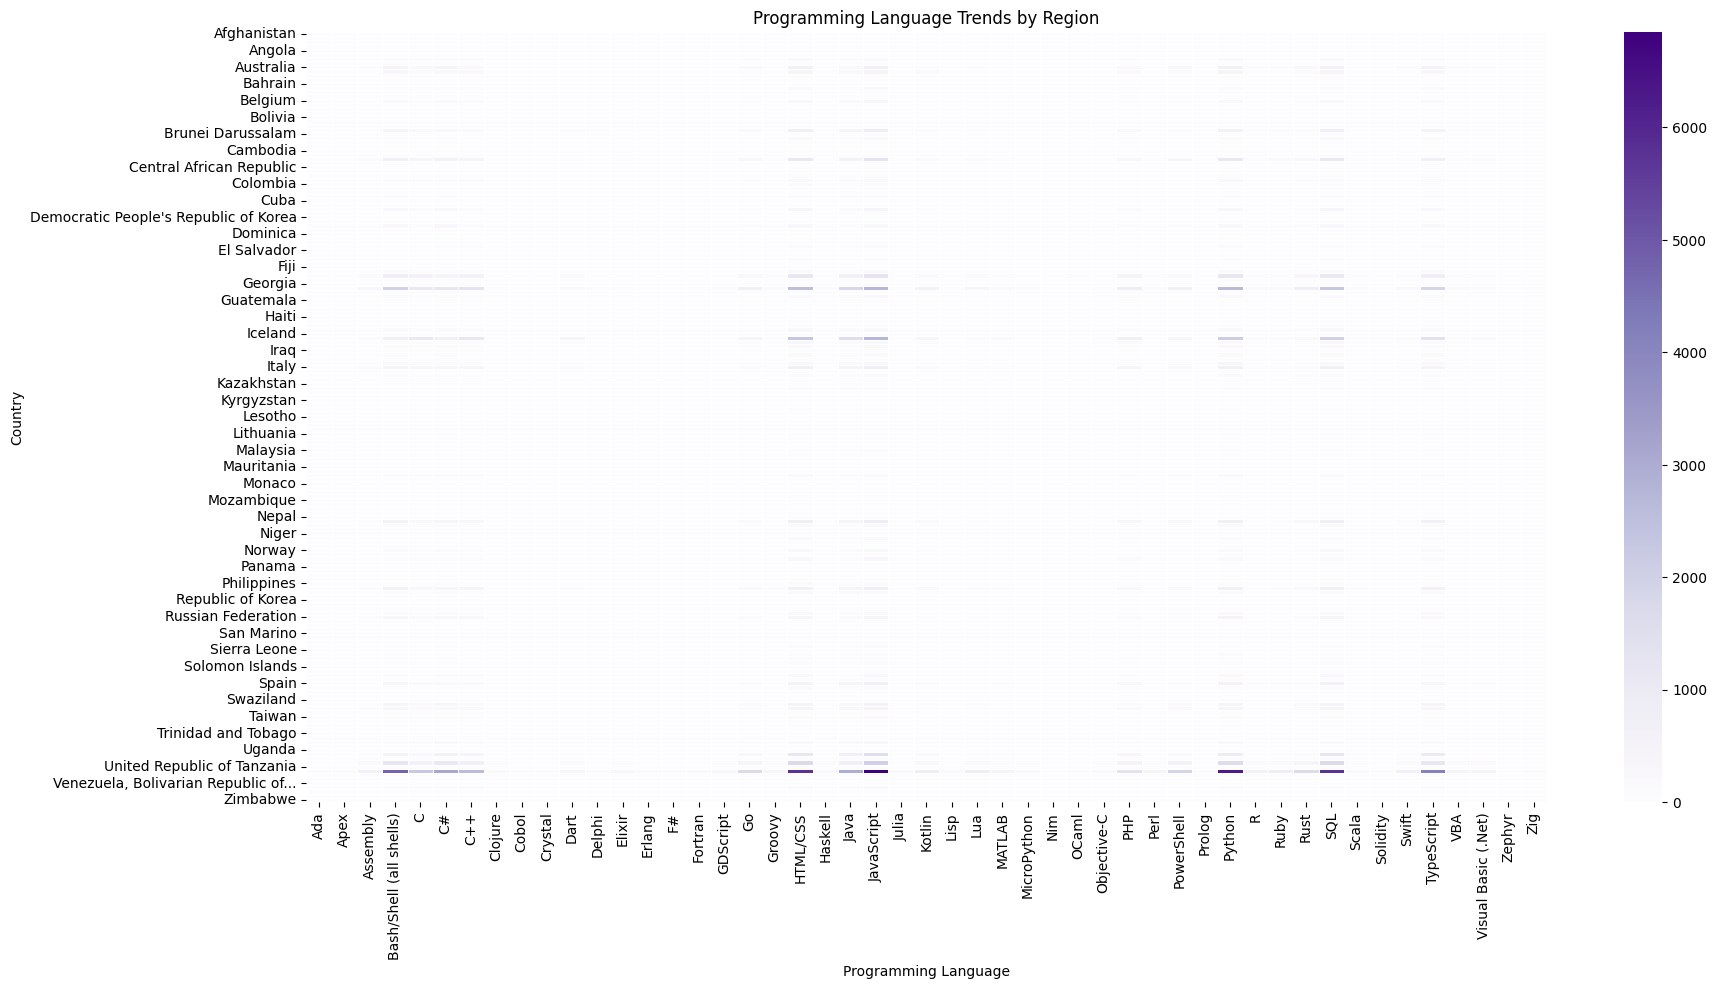

In [11]:
## Write your code here
df_exploded = df.assign(LanguageHaveWorkedWith=df['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')
country_data = df_exploded[df_exploded['Country'] == 'United States of America']

language_counts = country_data['LanguageHaveWorkedWith'].value_counts().reset_index()
language_counts.columns = ['Programming Language', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(data=language_counts.head(10), x='Count', y='Programming Language', palette='muted')
plt.xlabel('Count')
plt.ylabel('Programming Language')
plt.title('Top Programming Languages in the US')
plt.show()

language_region_pivot = df_exploded.pivot_table(index='Country', columns='LanguageHaveWorkedWith', aggfunc='size', fill_value=0)

plt.figure(figsize=(20, 10))
sns.heatmap(language_region_pivot, cmap='Purples', linewidths=.5)
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.title('Programming Language Trends by Region')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


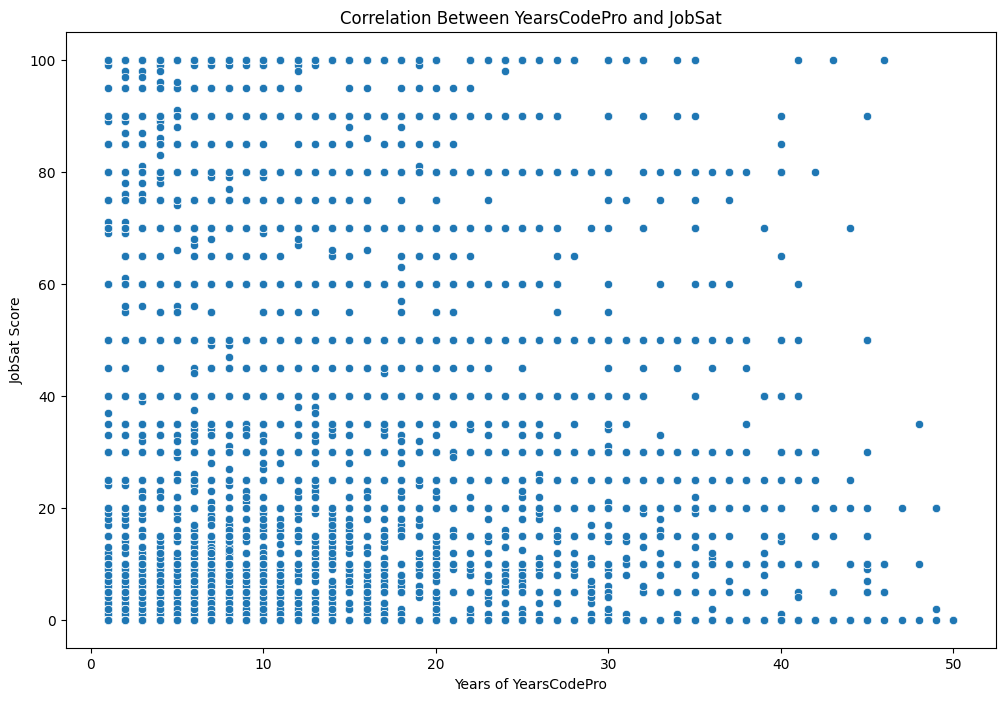

Correlation coefficient: -0.03284640929635467


In [15]:
## Write your code here
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1')
plt.xlabel('Years of YearsCodePro')
plt.ylabel('JobSat Score')
plt.title('Correlation Between YearsCodePro and JobSat')
plt.show()

correlation = df['YearsCodePro'].corr(df['JobSatPoints_1'])
print(f"Correlation coefficient: {correlation}")

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


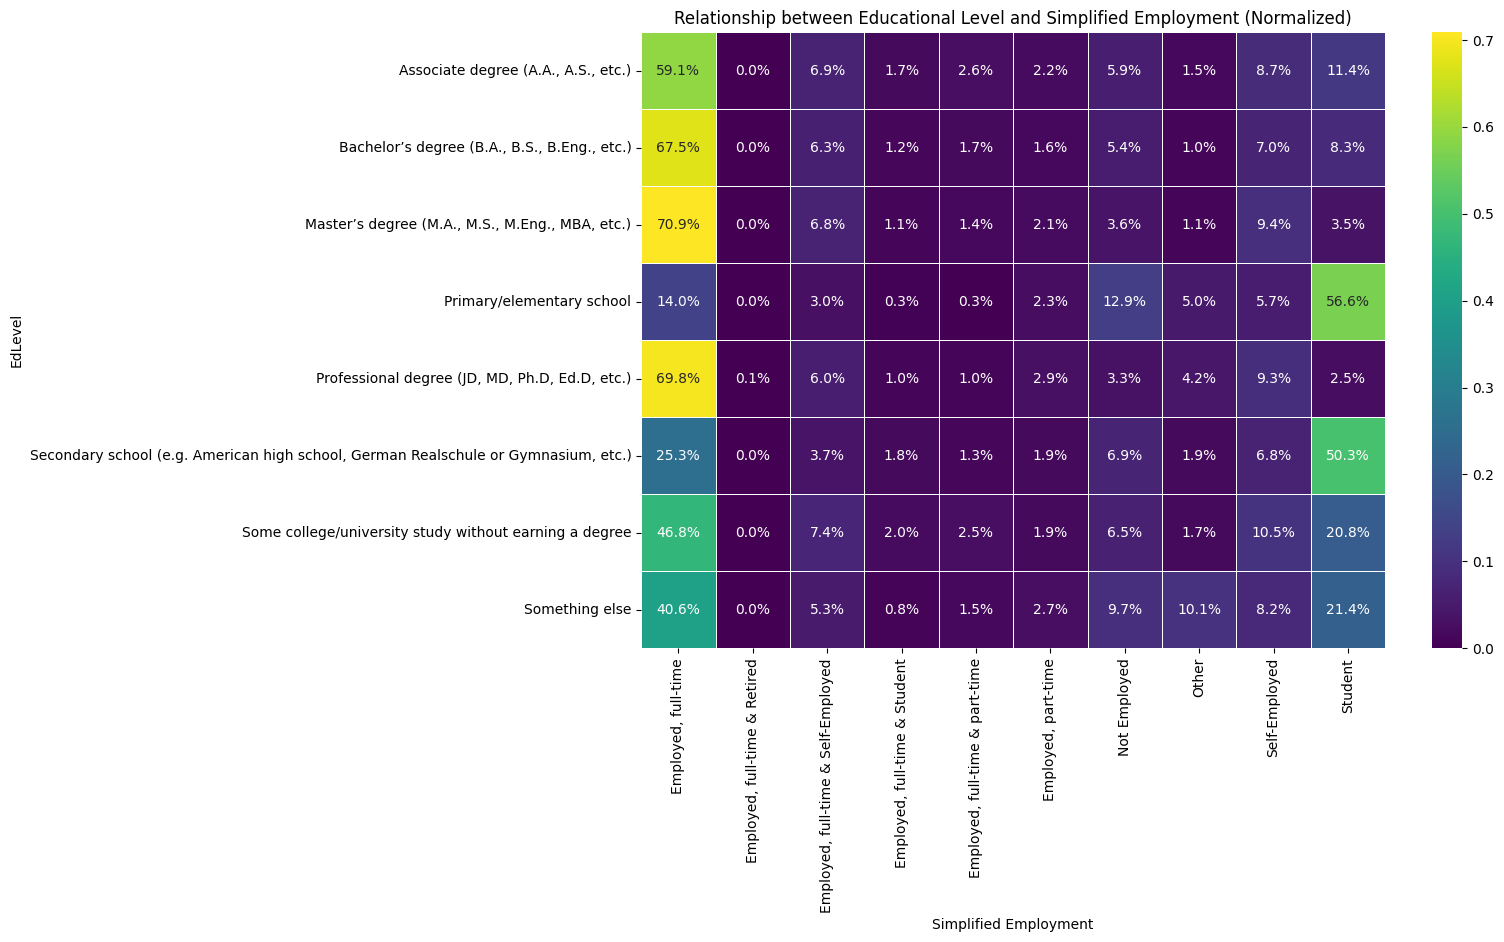

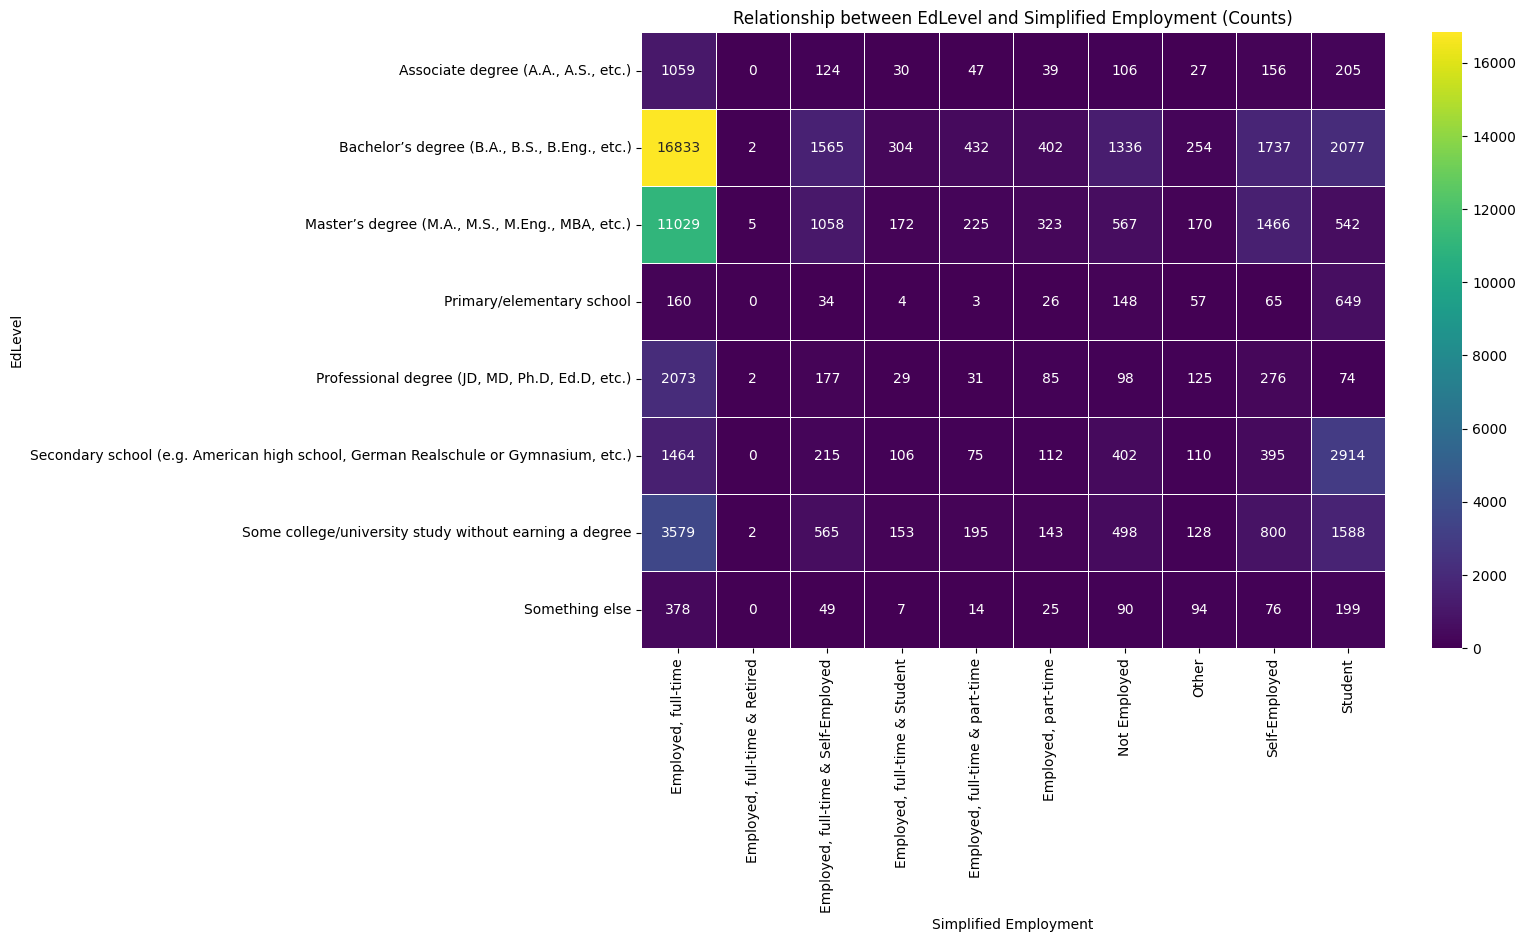

In [18]:
## Write your code here
def simplify_employment(employment):
    if "Employed, full-time" in employment:
        if "Independent contractor" in employment or "freelancer" in employment or "self-employed" in employment:
            return "Employed, full-time & Self-Employed"
        elif "part-time" in employment:
          return "Employed, full-time & part-time"
        elif "Student" in employment:
          return "Employed, full-time & Student"
        elif "Retired" in employment:
          return "Employed, full-time & Retired"
        else:
            return "Employed, full-time"
    elif "Student" in employment:
        return "Student"
    elif "Not employed" in employment:
        return "Not Employed"
    elif "Independent contractor" in employment or "freelancer" in employment or "self-employed" in employment:
        return "Self-Employed"
    elif "Employed, part-time" in employment:
        return "Employed, part-time"
    else:
        return "Other"

df['Simplified_Employment'] = df['Employment'].apply(simplify_employment)
edlevel_simplified_employment_crosstab = pd.crosstab(df['EdLevel'], df['Simplified_Employment'])

edlevel_simplified_employment_crosstab_normalized = edlevel_simplified_employment_crosstab.div(edlevel_simplified_employment_crosstab.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(edlevel_simplified_employment_crosstab_normalized, annot=True, cmap="viridis", fmt=".1%", linewidths=.5)
plt.title('Relationship between Educational Level and Simplified Employment (Normalized)')
plt.xlabel('Simplified Employment')
plt.ylabel('EdLevel')
plt.yticks(rotation=0)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(edlevel_simplified_employment_crosstab, annot=True, cmap="viridis", fmt="d", linewidths=.5)
plt.title('Relationship between EdLevel and Simplified Employment (Counts)')
plt.xlabel('Simplified Employment')
plt.ylabel('EdLevel')
plt.yticks(rotation=0)
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [19]:
## Write your code here
df.to_csv('cleaned_survey_data.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
